# S-Wave Prediction

## Global Variables.
This values will be use throughout the algorithm.

SeisLab https://www.mathworks.com/matlabcentral/fileexchange/53109-seislab-3-02?s_tid=FX_rc1_behav

In [1]:
global obj pred num

% obj: Integer. Refers to location of the well log column in the ".LAS" file, that is the target of the prediction.
obj=3;

% pred: Vector. Refers to location of the well logs columns in the ".LAS" file, selected as input to train the model.
pred=[6 7];

% num: Number of independent variables, i.e. size of the vector "pred".
num=size(pred,2);

% Selection of prediction technique.
% 1: Genetic Algorithms using linear equation.
% 2: Genetic Algorithms using polynomial equation.
% 3: Fuzzy Logic.
PREDICCION=3;

## Exploratory Data Analysis

Summarize about ".LAS" format. The information is in this [link](https://www.cwls.org/wp-content/uploads/2017/02/Las2_Update_Feb2017.pdf).

Summarize about "SeisLab3.02" package and the struct returned using "read_las_file". You can download from Mathworks [here](https://www.mathworks.com/matlabcentral/fileexchange/53109-seislab-3-02)

In [2]:
% Add to path:
% Folder with training and test data.
addpath(genpath('Data'))

% Folder with 'SeisLab3.02' package
addpath(genpath('SeisLab3.02'))

% Folder with functions made it to this project
addpath(genpath('Functions'))

### Training Data

Explain that it was selected Well-01 as training data.
Well logs and curves are used as synonyms.

In [3]:
% Well tops definition. They are otherwise known as picks or markers. They define the top and the bottom of the
% stratigraphic unit of interest. 
% Matrix "marker": The 1st row is related to training data and 2nd row to test data.
% markers = [[top bottom] ; 
%            [top bottom]]

WELL_TOPS = [[7297.9702, 7377.0601] ; [8295.0703, 8377.0703]];

In [4]:
% Load training data.
% "read_las_file" in 'SeisLab3.02' package return a structure array with all the information from ".LAS" file
Training_data=read_las_file('Well-1.LAS');

Log step size not uniform enough; step size changed to 0



<i>"Log step size not uniform enough"</i> means that in this data the sampling interval is not the same in all well logs. In these cases, the function "read_las_file" change the step size in order to put together all well logs and fill data with NaN values.

In the structure returned by <i>"read_las_file"</i> function, the field <i>"curve_info"</i> has <b>Curve Information</b> from the ".LAS" file that describes the curves and its units in the order they appear in the ~ASCII log data section. The first channel (Depth Index) is the index of all other channels.

In [5]:
% NaN values into Well-01
disp('Percentage of NaN values in training data by curve:')

% Number of rows in Training data matrix
nRows = size(Training_data.curves,1);

% Compute the percentage of NaN values in each curve.
for item = 2:7
    nan_values = Training_data.curves(isnan(Training_data.curves(:,item)), item);
    pNan = (size(nan_values, 1) / nRows) * 100;
    fprintf('%s: %2.2f%%\n', string(Training_data.curve_info(item, 3)), pNan);
end

Percentage of NaN values in training data by curve:
Density: 53.88%
Delta-T Shear: 13.75%
Delta-T Compressional: 13.75%
Water Saturation: 68.55%
Neutron Porosity: 68.55%
Shale Volume: 68.55%



Here, we can see the high number of NaN values in each curve from Well-01. This could be by:
- A large number of depth intervals without data (gaps).
- NaN values added to curves by "read_las_file" function, due to step size is not uniform along all the curves.

In order to analyse the first hypothesis, let's plot Density, Delta-T Shear and Shale Volume. The function <i>"plotWellLogs"</i> filter NaN values and include two green lines for well tops.

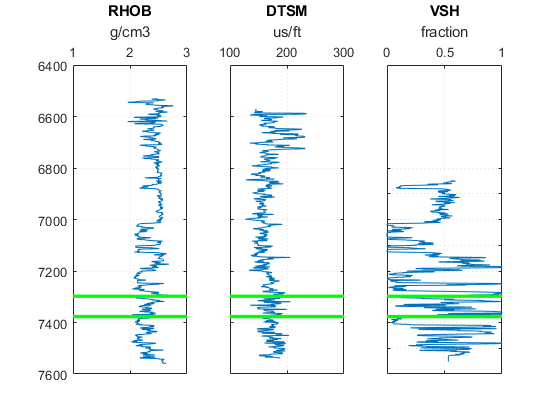

In [6]:
% plotWellLogs(data, wellNames, units, wellTops)
plotWellLogs(Training_data.curves(:,[1, 2, 3, 7]), ...     % data: [DEPTH, RHOB, DTSM, VSH]
            Training_data.curve_info([1, 2, 3, 7], 1), ... % wellNames: Column 1 from Training_data.curve_info
            Training_data.curve_info([1, 2, 3, 7], 2), ... % units: Column 2 from Training_data.curve_info
            WELL_TOPS(1,:));

Several observations can be made from this graph:
- The interval measurement of the curves is not the same.
- There is no visible gaps into the curves.
- The data is complete into the stratigraphic unit of interest.

Now, let's see these intervarls in each curve.

In [ ]:
% Fill the gaps with interpolation and resample to 0.5 ft.

In [33]:
% Print measurement interval of all curves
fprintf('Measurement interval for all curves in %s (Training Data):\n', Training_data.wellname)
for iCols= 2: size(Training_data.curves, 2)
    first_index = find(~isnan(Training_data.curves(:,iCols)), 1, 'first');
    last_index = find(~isnan(Training_data.curves(:,iCols)), 1, 'last');
    fprintf('%s: (%4.1f - %4.1f) ft\n',  string(Training_data.curve_info(iCols,3)),...
                                    Training_data.curves(first_index,1), ...
                                    Training_data.curves(last_index,1))
end

Measurement interval for all curves in Well-1 (Training Data):
Density: (6530.5 - 7560.0) ft
Delta-T Shear: (6570.0 - 7540.0) ft
Delta-T Compressional: (6570.0 - 7540.0) ft
Water Saturation: (6850.0 - 7552.0) ft
Neutron Porosity: (6850.0 - 7552.0) ft
Shale Volume: (6850.0 - 7552.0) ft



Base on these intervals and the limits of the Training area: 7150 - 7500 add 150 (top) - 120ft (bottom)

In [5]:
% Load test data.
Test_data=read_las_file('Well-2.LAS');

In [25]:
ed = l_fill_gaps(Training_data, 'sw');

In [29]:
% ed.curves

The sample interval of Depth column is not the same along the data. We need to resample at 0.5 ft, dealing with NaN values

- Plot one log with the interest area to show where is it. Later say that we have to select only 200 ft above to end hole.


- Make the plots only with this values.
- Crossplots VP-Density and color with Vshale or Porosity or Water Saturation.
- Histogram for shale densities and sand desities and show the difference.


- l_interpolate interpolates null values of all curves specified.
- Modify "grafica_registro" in order to join y axis in order to have more space to plots.

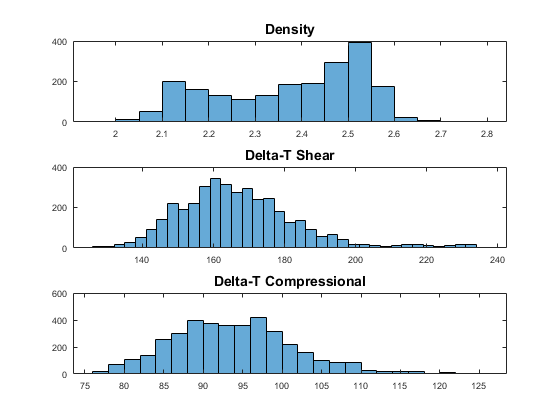

In [6]:
% Plot RHOB, DTCO, DTSM histogram
for item = 1:3
    ax = subplot(3, 1, item);
    histogram(Training_data.curves(:, item+1));
    ax.FontSize = 7;
    ax.TitleFontSizeMultiplier = 1.5;
    title(Training_data.curve_info(item+1,3));
end

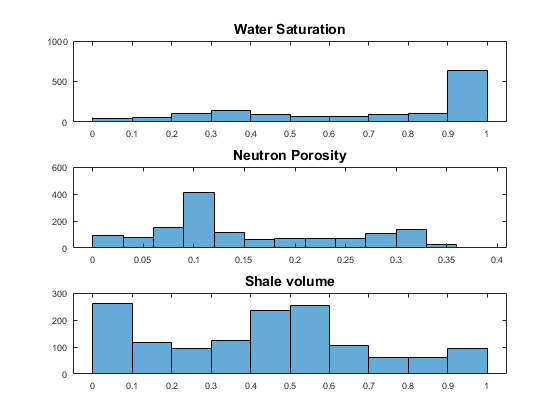

In [7]:
% Plot RHOB, DTCO, DTSM histogram
for item = 1:3
    ax = subplot(3, 1, item);
    histogram(Training_data.curves(:, item+4));
    ax.FontSize = 7;
    ax.TitleFontSizeMultiplier = 1.5;
    title(Training_data.curve_info(item+4,3));
end

In [100]:
disp('Number of NaN values in training data:')
for item = 2:7
    nan_values = Training_data.curves(isnan(Training_data.curves(:,item)), item);
    fprintf('%s: %d\n', string(Training_data.curve_info(item, 3)), size(nan_values, 1));
end

Number of NaN values in training data:
Density: 2407
Delta-T Shear: 614
Delta-T Compressional: 614
Water Saturation: 3062
Neutron Porosity: 3062
Shale volume: 3062



- The number of NaN values is different. We have to deal with it.
- Print NaN values in the interest area
- Drop NaN values and rescale to 0.5 ft
- Plot Box plot and cross plot here in order to see some primary correlations.

In [104]:
disp('Number of NaN values in test data:')
for item = 2:7
    nan_values = test_data.curves(isnan(test_data.curves(:,item)), item);
    fprintf('%s: %d\n', string(test_data.curve_info(item, 3)), size(nan_values, 1));
end

Number of NaN values in test data:
Density: 11
Delta-T Shear: 0
Delta-T Compressional: 1
Shale volume: 1568
Water Saturation: 1568
Neutron Porosity: 1568



In [23]:
% By now, I think this is not important to transform DT data to Velocity.

## Pre-processing data

Check overfitting - underfitting

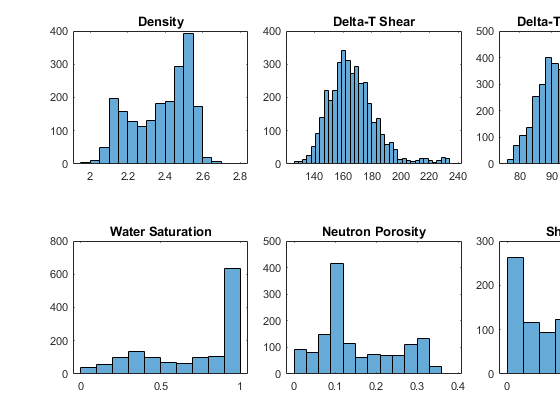

In [8]:
[rows, columns] = size(Training_data.curve_info);

axis = zeros(6,4);
f = cell(6,1);
for i= 2:rows

    ax = subplot(3, 3, i-1);
    histogram(Training_data.curves(:, i));
    ax.FontSize = 8;
    ax.TitleFontSizeMultiplier = 1.2;

    f{i-1} = ax;
    axis(i-1, :) = get(ax, 'position');

    title(Training_data.curve_info(i,3));
end

var = get(f{1}, 'position');
set(f{1}, 'position', var + [0, -0.1, 0.1, 0.1]);

var = get(f{2}, 'position');
set(f{2}, 'position', var + [0.1, -0.1, 0.1, 0.1]);

var = get(f{3}, 'position');
set(f{3}, 'position', var + [0.2, -0.1, 0.1, 0.1]);

var = get(f{4}, 'position');
set(f{4}, 'position', var + [0, -0.3, 0.1, 0.1]);

var = get(f{5}, 'position');
set(f{5}, 'position', var + [0.1, -0.3, 0.1, 0.1]);

var = get(f{6}, 'position');
set(f{6}, 'position', var + [0.2, -0.3, 0.1, 0.1]);